# Análisis descriptivo de la pobreza multidimensional 2020
<p style="text-align: center;"> Diego Ariel Soto Díaz | 1797743 </p>
<p style="text-align: center;"> 05 de Marzo del 2023 </p>

### Índice
### 1.  [Introducción](#int)
### 2.  [Relación entre educación y pobreza](#edu)
### 3. [Relación entre etnicidad y pobreza](#etnia)
### 4.  [Relación entre estado civil y pobreza](#edo)
### 5.  [Relación entre trabajo y pobreza](#trab)
#### -  [Formalidad y pobreza](#form)
   #### -  [Tipo de trabajo y pobreza](#sinco)
   #### -  [Empleo temporal y pobreza](#temp)
### 7.  [Relación entre región geográfica y pobreza](#region)
### 8.  [Relación entre discapacidad y pobreza](#disc)
### 9.  [Conclusión](#conc)
### 10.  [Anexo](#anexo)

<span style="page-break-before: always !important">⚀</span>

Utilizando la información del Consejo Nacional de Evaluación de la Política de Desarrollo Social (CONEVAL) del 2020, realizaremos un análisis descriptivo con los siguientes elementos:

| Parámetro                                   |  Variable   | Key                         |
|:--------------------------------------------|:-----------:|:----------------------------|
| Sexo                                        | sexo        | 1 = Masculino, 2 = Femenino |
| Edad en años                                | edad        |                             |
| Se considera indígena                       | etnia       | 1 = Sí, 2 = No              |
| Educación                                   | niv_ed      | 0 = Primaria incompleta o menos <br> 1 = Primaria completa o secundaria incompleta <br> 2 = Secundaria completa o media superior incompleta <br> 3 = Media superior completa o más |
| Estado Civil                                | edo_conyug  | 1 = Unión libre <br> 2 = Casado <br> 3 = Separado <br> 4 = Divorciado <br> 5 = Viudo <br> 6 = Soltero |
| Número de hijos                             | hijos_sob   |                             |
| Ingreso corriente total del hogar           | ict         |                             |
| Transferencias de programas sociales        |             |                             |
| Remesas                                     | remesas     |                             |
| Migración                                   |             |                             |
| Ocupación                                   | sinco       | [Sistema Nacional de Clasificación de Ocupaciones, Pag. 4](https://www.snieg.mx/Documentos/Normatividad/Vigente/SINCO_2019.pdf#page=4) |
| Experiencia                                 |             |                             |
| Depósitos en cuentas de ahorros, etc.       | deposito    |                              |
| Tipo de trabajo: temporal o permanente      | tipocontr   | 1 = Temporal, 2 = Permanente |
| Grado de inseguridad alimentaria            | ins_ali     | 0 = Seguridad alimentaria <br> 1 = Inseguridad alimentaria leve <br> 2. Inseguridad alimentaria moderada <br> 3. Inseguridad alimentaria severa  |
| Deudas                                      | deudas      |                             |
| Formalidad vs informalidad                  | seguro      | 0 = No tiene seguro médico (informal) <br> 1 = Tiene seguro médico (formal) |
| Tamaño de empresa en la que trabaja         | tam_emp     |                             |
| Discapacidad                                | discap      | 0 = No presenta discapacidad <br> 1 = Presenta discapacidad |
| Pobreza                                     | pobreza     | 0 = No pobre, 1 = Pobre                                     |
| Pobreza extrema                             | pobreza_e   | 0 = No pobre extremo, 1 = Pobre extremo |




#### Importamos librerías necesarias

In [3]:
import warnings
warnings.filterwarnings('ignore')
#Data wrangling
import pandas as pd
import numpy as np
import random

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
#Jupyter notebook implementation
%matplotlib inline

In [4]:
pobreza_df = pd.read_csv('pobreza_20.csv')

Mantenemos las variables que vamos a utilizar

In [5]:
df = pobreza_df[['ubica_geo','sexo', 'edad', 'etnia', 'niv_ed', 'edo_conyug', 'hijos_sob', 'ict', 'remesas', 'sinco', 'deposito', 'tipocontr', 'ins_ali', 'deudas', 'seguro', 'tam_emp', 'discap', 'pobreza', 'pobreza_e']]

#### Crear variables de estado y región

In [6]:
## Crear variable de estado desde ubica_geo

# Añadir leading zero a ubica_geo
df['ubica_geo'] = df['ubica_geo'].astype(str)
df['ubica_geo'] = df['ubica_geo'].apply(lambda x: x.zfill(5))

# Crear nueva variable de los primeros dos digitos de ubica_geo
df['estado'] = df['ubica_geo'].str[:2]

In [7]:
#Crear variable región Norte: 1  Sur: 2 Este: 3 Oeste: 4
region_dict = {'01':1, '02':4, '03': 4, '04': 2, '05': 1, '06': 4, '07': 2, '08': 1, '09': 3, '10': 1, '11': 3, '12': 2, '13': 3, '14': 4, '15': 3, '16': 4, '17': 3, '18': 4, '19': 1, '20': 2, '21': 3, '22': 3, '23': 2, '24': 3, '25': 4, '26': 4, '27': 2, '28': 1, '29': 3, '30': 3, '31': 2, '32': 1}
estado_dict = {'01': 'Aguascalientes', '02': 'Baja California', '03': 'Baja California Sur', '04': 'Campeche', '05': 'Coahuila', '06': 'Colima', '07': 'Chiapas', '08': 'Chihuahua', '09': 'Ciudad de México', '10': 'Durango', '11': 'Guanajuato', '12': 'Guerrero', '13': 'Hidalgo','14': 'Jalisco','15': 'México','16': 'Michoacán','17': 'Morelos','18': 'Nayarit','19': 'Nuevo León','20': 'Oaxaca','21': 'Puebla','22': 'Querétaro','23': 'Quintana Roo','24': 'San Luis Potosí','25': 'Sinaloa','26': 'Sonora','27': 'Tabasco','28': 'Tamaulipas','29': 'Tlaxcala','30': 'Veracruz','31': 'Yucatán','32': 'Zacatecas'}

df['region'] = df['estado'].apply(lambda x: region_dict.get(str(x), np.nan))
df['estado_nombre'] = df['estado'].apply(lambda x: estado_dict.get(str(x), np.nan))

<span style="page-break-before: always !important">⚀</span>

# Pobreza en México
## Introducción <a name="int"></a>

La pobreza es uno de los mayores retos a los que se enfrenta México, un país con una gran diversidad cultural y geográfica. La medición y análisis de la pobreza es fundamental para comprender la situación socioeconómica de la población y diseñar políticas públicas efectivas para su reducción. 

El presente trabajo tiene como objetivo realizar un análisis descriptivo de la pobreza en México, tomando en cuenta diferentes dimensiones como ingreso, educación, edad y diversas características. Se utilizarán datos condensados por el CONEVAL y algunos otros, como la formalidad, etnicidad, ocupación, entre otros, de la Encuesta Nacional de Ingreso y Gasto de los Hogares (ENIGH) de la INEGI.

## Relación entre educación y pobreza por edad<a name="edu"></a>

A medida que se ha avanzado en la medición y análisis de la pobreza, se ha evidenciado que la educación es uno de los factores determinantes para superarla.

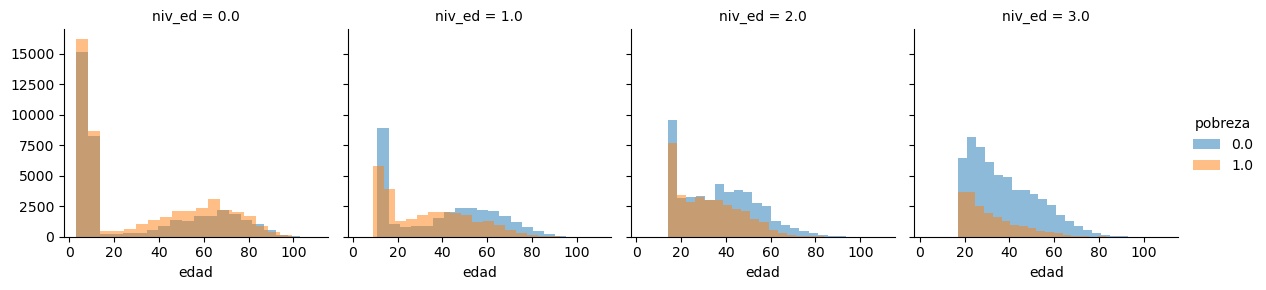

In [8]:
grid = sns.FacetGrid(pobreza_df, col = 'niv_ed', hue = 'pobreza')

grid.map(plt.hist, 'edad', alpha = .5, bins = 20)
grid.add_legend()

In [9]:
pobreza_df[['niv_ed', 'pobreza', 'pobreza_e']].groupby(['niv_ed'], as_index = False).mean()

,niv_ed,pobreza,pobreza_e
0,0.0,0.548382,0.132824
1,1.0,0.471824,0.101047
2,2.0,0.420102,0.064959
3,3.0,0.237818,0.025260


De la gráfica podemos observar que a medida de que el nivel educativo aumenta, la pobreza va disminuyendo en los grupos de edad más elevados. Esto podría explicarse de dos maneras:
1. Las personas más viejas tienen más experiencia por lo que tienen un ingreso más alto.
2. La educación superior tenía un mayor valor en el mercado laboral en el pasado que en la actualidad debido al aumento en la oferta de graduados universitarios.

Siguiendo la idea del segundo punto, será interesante ver esta misma gráfica en 50 años y ver si esta misma relación sigue existiendo.

En la tabla podemos ver la distribución de la pobreza en los diversos niveles educativos. El 54.83% de las personas con primaria incompleta o menos es pobre y el 13.28% es pobre extremo. Y al otro lado de la distribución están las personas con media superior completa o más. El 23.78% es pobre mientras que solamente el 2.52% se encuentra en pobreza extrema.

## Etnicidad y pobreza por edad <a name="etnia"></a>

In [10]:
pobreza_df[['etnia', 'pobreza']].groupby(['etnia'], as_index = False).mean()

,etnia,pobreza
0,1.0,0.535840
1,2.0,0.364738


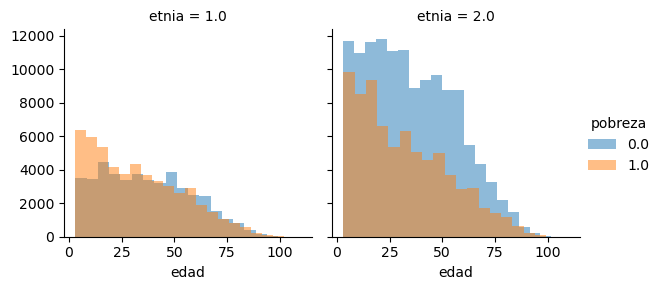

In [11]:
grid = sns.FacetGrid(pobreza_df, col = 'etnia', hue = 'pobreza')
grid.map(plt.hist, 'edad', alpha = 0.5, bins = 20)
grid.add_legend()

Siguiendo el descriptor de bases de la ENIGH, cuando etnia toma el valor de 2 quiere decir que la persona **no** se considera indígena.

La tabla muestra que el porcentaje de personas en situación de pobreza es más alto entre aquellas que se consideran indígenas (53.6%) en comparación con las que no se consideran (36.5%). Esto sugiere que existe una relación entre la pertenencia étnica y la pobreza, y que las poblaciones indígenas podrían estar en una situación de desventaja en términos socioeconómicos. Sin embargo, es importante tener en cuenta que esta relación podría estar influenciada por otros factores, como la ubicación geográfica o el acceso a recursos y oportunidades.

## Estado civil y pobreza <a name="edo"></a>

In [12]:
pobreza_df[['edo_conyug', 'pobreza', 'pobreza_e']].groupby(['edo_conyug'], as_index = False).mean()
# 1. Vive con su pareja o unión libre
# 2. Está casado(a)
# 3. Está separado(a)
# 4. Está divorciado(a)
# 5. Es viudo(a)
# 6. Está soltero(a)

,edo_conyug,pobreza,pobreza_e
0,1.0,0.477919,0.107207
1,2.0,0.367542,0.068278
2,3.0,0.407070,0.069014
3,4.0,0.237537,0.024927
4,5.0,0.382192,0.070627
5,6.0,0.408685,0.075788


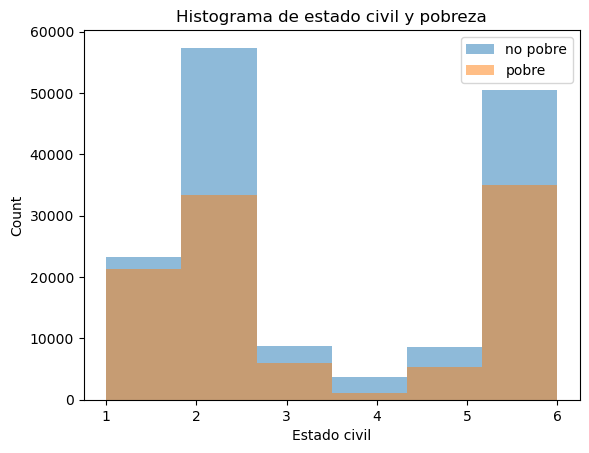

In [13]:
pobreza_1 = df[df['pobreza'] == 1]['edo_conyug']
pobreza_0 = df[df['pobreza'] == 0]['edo_conyug']

plt.hist(pobreza_0, bins = 6, alpha = 0.5, label = 'no pobre')
plt.hist(pobreza_1, bins = 6, alpha = 0.5, label = 'pobre')

plt.xlabel('Estado civil')
plt.ylabel('Count')
plt.title('Histograma de estado civil y pobreza')
plt.legend(loc='upper right')
plt.show()

La situación conyugal pudiera no ser un determinante relevante de la pobreza ya que las personas de todos los estados civiles tienen una tasa de pobreza significativa. 

Existe una diferencia significativa entre las personas que viven con su pareja (unión libre) y las personas casadas, una teoría obvia es que las personas sin dinero es menos probable que se casen por lo que permanecen en unión libre. 

Las personas que viven con su pareja tienen la tasa más alta de pobreza, seguidas por los separados y los solteros. Mientras que las personas divorciadas y casadas tienen tasas de pobreza relativamente más bajas. Siendo las personas divorciadas las _menos pobres_. Esto puede explicarse con que un divorcio es costoso por los que aquellos con más dinero estarían dispuestos a pagarlo mientras que los demás simplemente se separan.

<span style="page-break-before: always !important">⚀</span>

## Relación entre trabajo y pobreza <a name="trab"></a>


El trabajo es una de las principales fuentes de ingresos para la población y juega un papel fundamental en la lucha contra la pobreza. Sin embargo, la calidad del trabajo y su formalidad pueden tener un impacto significativo en la reducción de la pobreza. Es importante explorar la relación entre el trabajo y la pobreza para desarrollar políticas y programas efectivos que promuevan empleos de calidad y reduzcan la pobreza.

### Formalidad y pobreza <a name="form"></a>

En general, se considera que las personas que trabajan en empleos informales tienen menos estabilidad laboral, menores ingresos, menor acceso a prestaciones laborales y menos oportunidades de capacitación y desarrollo profesional en comparación con aquellos que trabajan en empleos formales. 
Esto puede conducir a una mayor vulnerabilidad económica y a una mayor probabilidad de caer en la pobreza.

Así como Levy (2008) y diversos autores, consideramos como un trabajador formal a aquel cuyo trabajo le proporciona un seguro médico.

In [14]:
pobreza_df[['seguro', 'pobreza', 'pobreza_e']].groupby(['seguro'], as_index = False).mean()

,seguro,pobreza,pobreza_e
0,0.0,0.480393,0.082433
1,1.0,0.115569,0.002957


In [15]:
pobreza_df[['pobreza_e', 'seguro']].groupby(['pobreza_e'], as_index = False).mean()

,pobreza_e,seguro
0,0.0,0.508931
1,1.0,0.033087


La primera tabla nos muestra el porcentaje del total de personas con o sin seguro que son pobres (pobreza) o pobres extremo (pobreza_e). El 48.03% de las personas que no tienen seguro son pobres mientras que el 8.24% están en pobreza extrema. En contraste, el 11.55% de las personas que sí tienen seguro son pobres y solamente el 0.3% se encuentran en pobreza extrema.

La segunda tabla se enfoca en la pobreza extrema y nos dice que el 3.3% de las personas en pobreza extrema tienen seguro, en comparación el 50.9% de las personas que no están en pobreza extrema sí tienen seguro.

También podemos añadirle la dimensión de edad de la siguiente manera

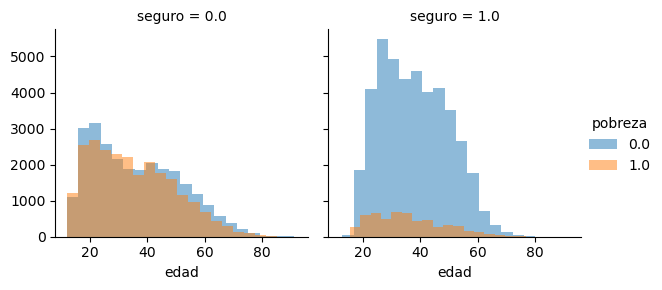

In [16]:
grid = sns.FacetGrid(pobreza_df, col = 'seguro', hue = 'pobreza')
grid.map(plt.hist, 'edad', alpha = 0.5, bins = 20)
grid.add_legend()

<div class=text-justify>
Se puede concluir que existe una relación significativa entre el tipo de empleo y la pobreza. Como podemos ver en la gráfica, la mitad de las personas con trabajo informal son pobres sin importar en que grupo de edad se encuentre, mientras que solamente el 11.55% de las personas con trabajo formal son pobres.
  
<br> Es posible que esta diferencia se deba a diversas razones. En la mayoría de los casos, los trabajos informales pueden no ofrecer salarios estables o prestaciones laborales, lo que hace que las personas con trabajos informales tengan mayor dificultad para cubrir sus necesidades básicas.
    
También es posible que los trabajos informales no requieran una educación formal o capacitación especializada, lo que limita las oportunidades de progreso y crecimiento laboral, por lo que limita las oportunidades de aumentar los ingresos.
</div>

### Tipo de empleo y pobreza <a name="sinco"></a>

La relación entre el tipo de empleo y la pobreza es un tema de gran interés en el análisis económico y social. La calidad del trabajo puede influir significativamente en los ingresos y en el acceso a beneficios y protección social, lo que a su vez puede tener un impacto en la pobreza y la desigualdad. Algunos tipos de empleo, como los trabajos agrícolas o artesanales, suelen tener salarios más bajos, menor protección social y mayores riesgos de inestabilidad laboral. En contraste, empleos con condiciones laborales más estables y con mayores beneficios sociales pueden contribuir a reducir la pobreza y la desigualdad. Por lo tanto, es importante entender la relación entre el tipo de empleo y la pobreza para poder diseñar políticas efectivas de reducción de la pobreza y la desigualdad.

El INEGI, a través del Sistema Nacional de Clasificación de Ocupaciones (sinco) categoriza los trabajos de la siguiente manera:
1.  *Funcionarios, directores y jefes*
2.  *Profesionistas y técnicos*
3.  *Trabajadores auxiliaries en actividades administrativas*
4.  *Comerciantes, empleados en ventas y agentes de ventas*
5.  *Trabajadores en servicios personales y de vigilancia*
6.  *Trabajadores en actividades agrícolas, ganaderas, forestales, caza y pesca*
7.  *Trabajadores artesanales, en las construcción u otros oficios*
8.  *Operadores de maquinaria industrial, ensambladores, choferes y conductores de transporte*
9.  *Trabajadores en actividades elemenatles y de apoyo*


In [18]:
df["sinco"] = df['sinco'].fillna(0)
df["trabajo"] = df.sinco.astype(str).str[:1]
df["trabajo"] = df["trabajo"].astype(float)
df[['trabajo', 'pobreza', 'pobreza_e']].groupby(['trabajo'], as_index = False).mean().sort_values(by = 'pobreza', ascending = True)

,trabajo,pobreza,pobreza_e
1,1.0,0.076080,0.004166
2,2.0,0.143903,0.013314
3,3.0,0.156028,0.010430
8,8.0,0.235481,0.019864
5,5.0,0.320686,0.035480
4,4.0,0.358844,0.044739
7,7.0,0.446248,0.076118
0,0.0,0.464451,0.086746
9,9.0,0.504758,0.115101
6,6.0,0.574947,0.191360


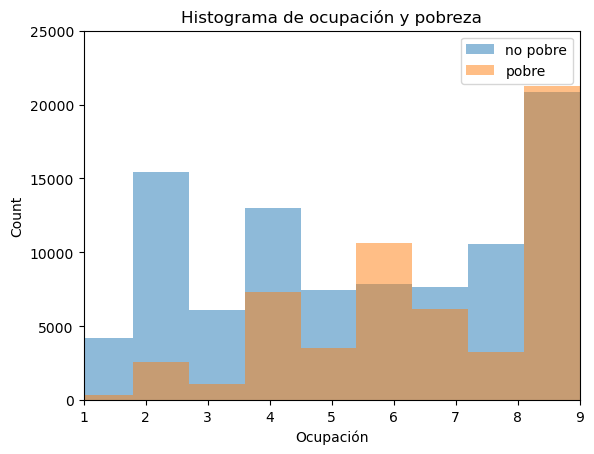

In [19]:
pobreza_1 = df[df['pobreza'] == 1]['trabajo']
pobreza_0 = df[df['pobreza'] == 0]['trabajo']

plt.hist(pobreza_0, alpha = 0.5, label = 'no pobre')
plt.hist(pobreza_1, alpha = 0.5, label = 'pobre')
plt.xlim(1,9)
plt.ylim(0, 25000)
plt.xlabel('Ocupación')
plt.ylabel('Count')
plt.title('Histograma de ocupación y pobreza')
plt.legend(loc='upper right')
plt.show()

A partir de los datos proporcionados, se puede concluir que hay una fuerte relación entre el tipo de trabajo y la pobreza en México. En general, las personas que trabajan en ocupaciones que requieren habilidades y educación más avanzadas, como los funcionarios, directores y jefes, y los profesionales y técnicos, tienen tasas de pobreza significativamente más bajas en comparación con los trabajadores en ocupaciones que no requieren tanta educación o habilidades especializadas.

Los trabajos donde hay menos pobres, proporcionalmente, son:
- ***Funcionarios, directores y jefes (1).***
- ***Profesionistas y técnicos (2).***

Mientras que los trabajos con más población en pobreza son:

- ***Trabajadores en actividades agrícolas, ganaderas, forestales, caza y pesca (9).***
- ***Trabajadores en actividades elementales y de apoyo (6).***

Este último, según la INEGI, clasifican los trabajadores que auxilian los procesos productivos, realizando actividades sencillas
y rutinarias que implican básicamente esfuerzo físico, destreza motriz y conocimientos básicos que se aprenden en la práctica en sólo unas jornadas de trabajo.

Estos datos sugieren que la educación y las habilidades son factores importantes que influyen en las oportunidades laborales y la reducción de la pobreza en México. Además, indican la necesidad de políticas y programas que apoyen la formación y capacitación de habilidades para mejorar el acceso a trabajos mejor remunerados y reducir la pobreza en el país.

### Trabajo temporal o permanente<a name="temp"></a>

El trabajo puede ser temporal o permanente, el primero es caracterizado por la falta de estabilidad laboral y se asocia con niveles más altos de pobreza. Con la variable tipocontr que toma el valor de 1 si el trabajo es temporal y 2 si es permanente, podemos analizar la relación que existe entre estos trabajos y la pobreza.

In [20]:
pobreza_df[['tipocontr', 'pobreza', 'pobreza_e']].groupby(['tipocontr'], as_index = False).mean().sort_values(by = 'pobreza', ascending = True)

,tipocontr,pobreza,pobreza_e
1,2.0,0.096048,0.001938
0,1.0,0.208609,0.013491


La tabla muestra la relación entre el tipo de contrato y la pobreza. Se observa que la tasa de pobreza es más alta en los empleos temporales (20.86%) en comparación con los empleos permanentes (9.60%). La pobreza extrema sigue esta misma relación con 1.35% de pobres en los empleos temporales y solamente 0.19% en los empleos permanentes. Esto sugiere que las personas que tienen empleos temporales tienen más probabilidades de vivir en condiciones de pobreza y pobreza extrema que su contraparte.

<span style="page-break-before: always !important">⚀</span>

## Región y pobreza <a name="region"></a>

In [21]:
df[['region', 'pobreza', 'pobreza_e']].groupby(['region'], as_index = False).mean()

,region,pobreza,pobreza_e
0,1,0.324929,0.036523
1,2,0.598349,0.189446
2,3,0.494312,0.090436
3,4,0.292465,0.032161


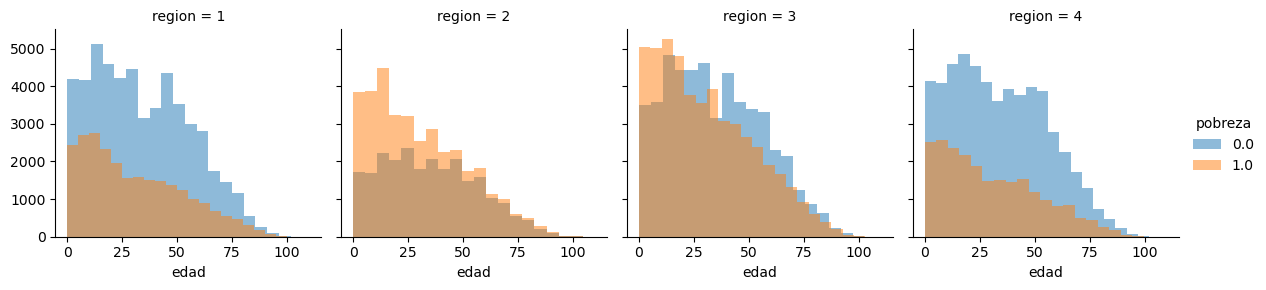

In [22]:
grid = sns.FacetGrid(df, col = 'region', hue = 'pobreza')
grid.map(plt.hist, 'edad', alpha = 0.5, bins = 20)
grid.add_legend()

La tabla muestra la relación entre la región en México y los niveles de pobreza y pobreza extrema en esas regiones. Se puede observar que la región con menor nivel de pobreza es la región norte, con una tasa de pobreza del 32.49%, seguida por la región oeste con una tasa de pobreza del 29.25%.

Por otro lado, la región con la tasa de pobreza más alta es la región sur, con un porcentaje del 59.83%. La región este también presenta una tasa alta de pobreza del 49.43%.

En cuanto a la pobreza extrema, la región con menor tasa es la región norte con un 3.65%, seguida de la región oeste con un 3.22%. La región este presenta la tasa más alta con un 9.04%, mientras que la región sur también presenta una tasa alta de pobreza extrema del 18.94%.

En conclusión, se puede observar que la región norte y oeste presentan los menores niveles de pobreza y pobreza extrema, mientras que las regiones este y sur presentan tasas más altas.

Existen diversas explicaciones para esta situación, algunas de las cuales son:

1. ***Diferencias en la estructura económica***: El norte y el oeste de México tienen una estructura económica más diversificada y dinámica, con sectores como la manufactura y la industria energética y minera, lo que les permite generar mayores empleos y mayores ingresos en comparación con el sur y el este, que tienen una economía más centrada en actividades primarias como la agricultura y la pesca.


2. ***Niveles de inversión y desarrollo***: Las regiones del norte y oeste de México han recibido históricamente mayores niveles de inversión en infraestructura y desarrollo en comparación con el este y el sur, lo que les ha permitido tener una mayor capacidad para generar riqueza y empleos.


3. ***Factores geográficos y climáticos***: El clima y las condiciones geográficas del sur y el este de México pueden hacer que ciertas actividades económicas sean menos viables o rentables, lo que a su vez puede limitar las oportunidades de empleo y los ingresos de las personas.


4. ***Diferencias culturales***: Las regiones del norte y el oeste de México han tenido una mayor influencia de la cultura estadounidense, lo que ha impulsado una cultura empresarial más emprendedora y orientada a la generación de riqueza, mientras que en el sur y el este prevalecen culturas más tradicionales y comunitarias, en donde el valor de la comunidad y la familia se priorizan sobre el individualismo y la acumulación de riqueza.

## Discapacidad y pobreza <a name="disc"></a>
La discapacidad y la pobreza son dos realidades que están estrechamente relacionadas. Las personas con discapacidad se encuentran en una posición de vulnerabilidad en lo que respecta a su acceso a oportunidades laborales, educativas y sociales, lo que puede llevar a una mayor probabilidad de caer en la pobreza. A su vez, la falta de recursos económicos puede limitar el acceso a servicios y apoyos que las personas con discapacidad necesitan para participar plenamente en la sociedad. Por lo tanto, la discapacidad y la pobreza se convierten en un ciclo interconectado que puede ser difícil de romper sin políticas y medidas específicas para abordar ambos problemas.

In [23]:
df[['discap', 'pobreza', 'pobreza_e']].groupby(['discap'], as_index = False).mean()

,discap,pobreza,pobreza_e
0,0.0,0.418839,0.080646
1,1.0,0.472905,0.094627


Es notable destacar que los resultados obtenidos desafían algunas hipótesis previas. Se observa que la tasa de pobreza es casi igual entre las personas sin y con discapacidad (41.8% y 47.29% respectivamente). Existen diversas explicaciones por las cuales tener discapacidad no necesariamente implica estar en pobreza:
1. La discapacidad no necesariamente implica una limitación para trabajar o generar ingresos. Muchas personas con discapacidad tienen habilidades que les permiten desempeñarse en distintas áreas laborales, lo que les permite generar ingresos.
2. Existen políticas públicas y programas de apoyo específicos para personas con discapacidad que buscan garantizar su inclusión laboral y social.
3. Las personas con discapacidad podrían tener una red de seguridad social importante que las apoyan económicamente.

<span style="page-break-before: always !important">⚀</span>

# Conculsión<a name="conc"></a>
En conclusión, la pobreza es un fenómeno complejo que está influenciado por una variedad de factores interrelacionados, tales como el nivel educativo, la etnicidad, el estado civil, el tipo de trabajo, la formalidad del empleo, la temporalidad del trabajo, la región geográfica y la discapacidad. A través de este trabajo, se ha podido evidenciar la complejidad de la relación entre estos factores y la pobreza. Si bien hay algunas tendencias claras, cada caso es único y requiere de un análisis cuidadoso y detallado para entender completamente las dinámicas y desafíos específicos que enfrentan las personas en situación de pobreza. Este trabajo puede servir como un punto de partida para futuras investigaciones y políticas que aborden los desafíos de la pobreza desde un enfoque multidimensional y holístico.

# Anexo<a name="anexo"></a>

### Estados y la región a la que pertenecen

In [24]:
df1 = df.drop_duplicates(subset='estado')
print(df1[['estado', 'estado_nombre', 'region']].to_string(index=False))

# 1. Norte
# 2. Sur
# 3. Este
# 4. Oeste

estado       estado_nombre  region
    01      Aguascalientes       1
    02     Baja California       4
    03 Baja California Sur       4
    04            Campeche       2
    05            Coahuila       1
    06              Colima       4
    07             Chiapas       2
    08           Chihuahua       1
    09    Ciudad de México       3
    10             Durango       1
    11          Guanajuato       3
    12            Guerrero       2
    13             Hidalgo       3
    14             Jalisco       4
    15              México       3
    16           Michoacán       4
    17             Morelos       3
    18             Nayarit       4
    19          Nuevo León       1
    20              Oaxaca       2
    21              Puebla       3
    22           Querétaro       3
    23        Quintana Roo       2
    24     San Luis Potosí       3
    25             Sinaloa       4
    26              Sonora       4
    27             Tabasco       2
    28          Tama

<p style="text-align: right;"><sub> Regiones generadas por ChatGPT </sub></p>